In [10]:
# Dependencies
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import pymongo
import json

# Data path
data_path="Resources/data.csv"

# Read csv file load into a dataframe
tumor_df = pd.read_csv(data_path, delimiter=",")
tumor_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
# Deleting column with no values
tumor_df.drop(columns=['Unnamed: 32'], inplace=True)
print(len(tumor_df))

569


array([[<AxesSubplot:title={'center':'radius_mean'}>]], dtype=object)

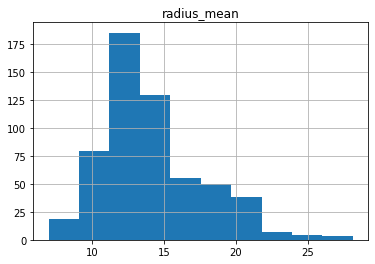

In [12]:
# Initial visualization to understand the data
tumor_df.hist("radius_mean")

In [13]:
# Calculating percentiles to divide the csv files into five csv files.
percent_list=list(np.percentile(tumor_df.radius_mean,[20,40,60,80,100]))
percent_list

[11.366, 12.726, 14.058000000000002, 17.067999999999998, 28.11]

In [14]:
# Create csv files based on the percentiles
df1=tumor_df.loc[tumor_df.radius_mean<percent_list[0]]
df1.to_csv(r"Resources\tumor1.csv", index=False)

df2=tumor_df.loc[(tumor_df.radius_mean>=percent_list[0]) & (tumor_df.radius_mean<percent_list[1])]
df2.to_csv(r"Resources\tumor2.csv", index=False)

df3=tumor_df.loc[(tumor_df.radius_mean>=percent_list[1]) & (tumor_df.radius_mean<percent_list[2])]
df3.to_csv(r"Resources\tumor3.csv", index=False)

df4=tumor_df.loc[(tumor_df.radius_mean>=percent_list[2]) & (tumor_df.radius_mean<percent_list[3])]
df4.to_csv(r"Resources\tumor4.csv",index=False)

df5=tumor_df.loc[tumor_df.radius_mean>=percent_list[3]]
df5.to_csv(r"Resources\tumor5.csv",index=False)

In [15]:
# Function to create json files
def createJson(csvName, jsonName):    
    
    # loading csv files to dataframe
    df1 = pd.read_csv(csvName, encoding = 'ISO-8859-1')

    # saving dataframe to json file
    df1.to_json(jsonName)
    
# Call function to create json files    
createJson("Resources/tumor1.csv", "Resources/tumor1.json")
createJson("Resources/tumor2.csv", "Resources/tumor2.json")
createJson("Resources/tumor3.csv", "Resources/tumor3.json")
createJson("Resources/tumor4.csv", "Resources/tumor4.json")
createJson("Resources/tumor5.csv", "Resources/tumor5.json")

In [16]:
# Connect to mongodb
myclient = MongoClient("mongodb://localhost:27017")

# create new database name: BreastCancer_DB
db = myclient["BreastCancer_DB"]

In [17]:
# Function to load json files into Mongo database
def createDB(jsonName, collName):
    
    # Create or Switch to collection name
    Col = db[collName]

    # Dropping collection if exists to avoid duplication
    if Col:
        Col.drop()

    # Loading or Opening the json file
    with open(jsonName, 'r') as file:
        file_data = json.load(file)

    # Inserting the loaded file to the Collection
    # if JSON contains data more than one entry
    # use 'insert_many' else use 'insert_one'
    if isinstance(file_data, list):
        Col.insert_many(file_data)  
    else:
        Col.insert_one(file_data)

# Function call to create collections in Mongo database
createDB("Resources/tumor1.json", "tumor1")
createDB("Resources/tumor2.json", "tumor2")
createDB("Resources/tumor3.json", "tumor3")
createDB("Resources/tumor4.json", "tumor4")
createDB("Resources/tumor5.json", "tumor5")

In [19]:
t2 = db.get_collection("tumor2")
for index, (key, value) in enumerate(t2.find_one().items()):
    if index == 10:
        print(key, '::', value)
        break


concave points_mean :: {'0': 0.1052, '1': 0.08089, '2': 0.08543, '3': 0.05182, '4': 0.02749, '5': 0.01115, '6': 0.01349, '7': 0.02278, '8': 0.06873, '9': 0.02272, '10': 0.02233, '11': 0.01863, '12': 0.03745, '13': 0.02941, '14': 0.0335, '15': 0.0177, '16': 0.03485, '17': 0.01921, '18': 0.06021, '19': 0.02008, '20': 0.02623, '21': 0.02882, '22': 0.026, '23': 0.02875, '24': 0.01861, '25': 0.03003, '26': 0.07415, '27': 0.02331, '28': 0.01963, '29': 0.03738, '30': 0.02822, '31': 0.037, '32': 0.02361, '33': 0.03239, '34': 0.01553, '35': 0.01654, '36': 0.04562, '37': 0.04107, '38': 0.03821, '39': 0.01393, '40': 0.03142, '41': 0.02036, '42': 0.01108, '43': 0.02929, '44': 0.02069, '45': 0.07404, '46': 0.02763, '47': 0.002924, '48': 0.03791, '49': 0.02173, '50': 0.0228, '51': 0.01924, '52': 0.03515, '53': 0.03099, '54': 0.01502, '55': 0.01313, '56': 0.01148, '57': 0.008907, '58': 0.006423, '59': 0.005051, '60': 0.01699, '61': 0.01692, '62': 0.02107, '63': 0.005592, '64': 0.008535, '65': 0.0325,